# Ejercicio 2 - Bit Plane Slicing

In [3]:
import cv2 as cv

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

## Item a - Ejemplo de la teoría

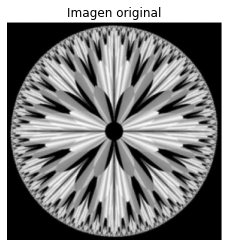

In [6]:
image_bit_slicing = cv.imread('../resources/bit-slicing.png', cv.IMREAD_GRAYSCALE)
plt.imshow(image_bit_slicing, cmap='gray')
plt.axis('off')
plt.title("Imagen original")
plt.show()

In [7]:
def slice_image(img, plane=1):
    new_bit_slicing = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
          if img[i][j] & 2**plane:
            new_bit_slicing[i][j] = 255
          else:
            new_bit_slicing[i][j] = 0

    return new_bit_slicing

In [8]:
def plot_8_bitplanes(img):
    fig, ax = plt.subplots(4, 2, figsize=(20, 20))
    ax00 = ax[0][0]
    ax01 = ax[0][1]
    ax10 = ax[1][0]
    ax11 = ax[1][1]
    ax20 = ax[2][0]
    ax21 = ax[2][1]
    ax30 = ax[3][0]
    ax31 = ax[3][1]

    ax00.set_title('Bit Plane 7', fontsize=15)
    ax00.imshow(slice_image(img, 7), cmap='gray', vmin=0, vmax=255)

    ax01.set_title('Bit Plane 6', fontsize=15)
    ax01.imshow(slice_image(img, 6), cmap='gray', vmin=0, vmax=255)

    ax10.set_title('Bit Plane 5', fontsize=15)
    ax10.imshow(slice_image(img, 5), cmap='gray', vmin=0, vmax=255)

    ax11.set_title('Bit Plane 4', fontsize=15)
    ax11.imshow(slice_image(img, 4), cmap='gray', vmin=0, vmax=255)

    ax20.set_title('Bit Plane 3', fontsize=15)
    ax20.imshow(slice_image(img, 3), cmap='gray', vmin=0, vmax=255)

    ax21.set_title('Bit Plane 2', fontsize=15)
    ax21.imshow(slice_image(img, 2), cmap='gray', vmin=0, vmax=255)

    ax30.set_title('Bit Plane 1', fontsize=15)
    ax30.imshow(slice_image(img, 1), cmap='gray', vmin=0, vmax=255)

    ax31.set_title('Bit Plane 0', fontsize=15)
    ax31.imshow(slice_image(img, 0), cmap='gray', vmin=0, vmax=255)
    
    plt.show()

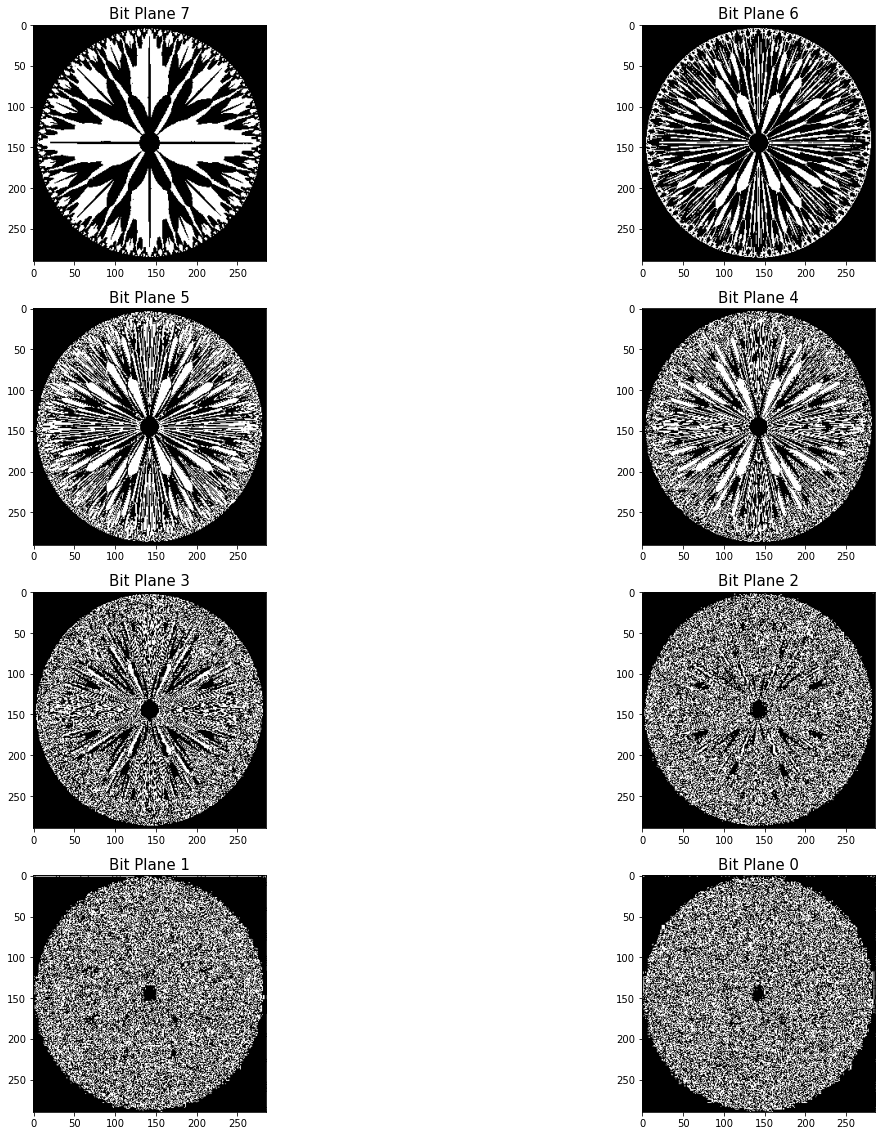

In [9]:
plot_8_bitplanes(image_bit_slicing)

## Item b - One dollar

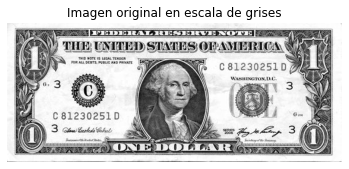

In [10]:
one_dollar = cv.imread('../resources/onedollar.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(one_dollar, cmap='gray')
plt.axis('off')
plt.title("Imagen original en escala de grises")
plt.show()

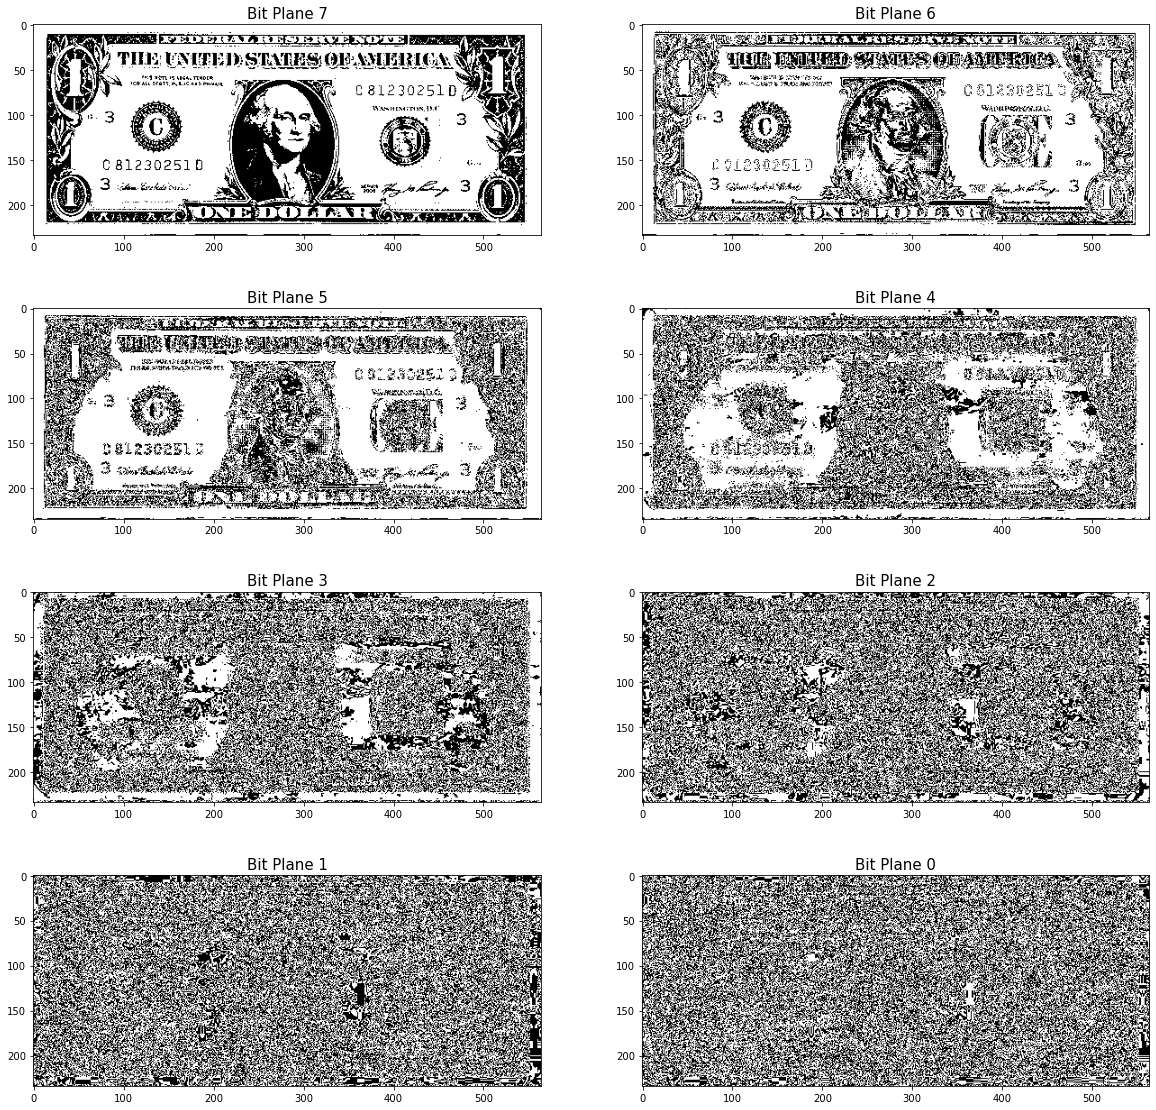

In [11]:
plot_8_bitplanes(one_dollar)

In [12]:
def generate_bitplanes(img, amount):
    bit_planes = [None]*amount
    for i in range(amount):
        bit_planes[i] = slice_image(img, i)
    return bit_planes

Veamos ahora como reconstruir la imágen original a partir de distintos planos.

In [13]:
bit_planes = generate_bitplanes(one_dollar, 8)

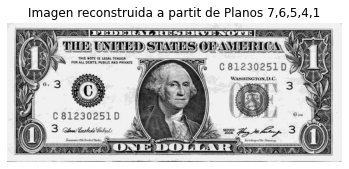

In [39]:
reconstructed_image = -(bit_planes[7] << 7) - (bit_planes[6] << 6) - (bit_planes[5] << 5) - (bit_planes[4] << 4) - (bit_planes[0] << 0)
plt.imshow(reconstructed_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Imagen reconstruida a partit de Planos 7,6,5,4,1")
plt.show()